In [1]:
import pyabf
#load ABF file: should give overview of all the channels 
abf = pyabf.ABF('C:\\Users\\Hannah\\Documents\\MATLAB\\air_puff_traces\\2026_01_30_0001\\2026_01_30_0001.abf')
print(abf)

ABF (v2.9) with 6 channels (mV, pA, V, V, V, V), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 6.32 minutes, recorded with protocol "DrJoes_Gapfree_Ball".


In [2]:
#set sampling rate
sampling_rate_ephys = 20000

In [3]:
abf.setSweep(0)

In [4]:
#check data
print(abf.headerText)


ABF Class Methods
abf.getAllXs()
abf.getAllYs()
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

ABF Class Variables
abfDateTime = 2026-01-30 10:01:10.027000
abfDateTimeString = 2026-01-30T10:01:10.027
abfFileComment =
abfFilePath = C:\Users\Hannah\Documents\MATLAB\air_puff_traces\2026_01_30_0001\2026_01_30_0001.abf
abfFolderPath = C:\Users\Hannah\Documents\MATLAB\air_puff_traces\2026_01_30_0001
abfID = 2026_01_30_0001
abfVersion = {'major': 2, 'minor': 9, 'bugfix': 0, 'build': 0}
abfVersionString = 2.9.0.0
adcNames = ['IN 0', 'IN 1', 'Pressure', 'yVel', 'xVel', 'zVel']
adcUnits = ['mV', 'pA', 'V', 'V', 'V', 'V']
channelCount = 6
channelList = [0, 1, 2, 3, 4, 5]
creator = Clampex 11.2.0.59
creatorVersion = {'major': 11, 'minor': 2, 'bugfix': 0, 'build': 59}
creatorVersionString = 11.2.0.59
dacNames = ['Cmd 0', 'Cmd 1', 'Cmd 2', 'Cmd 3', 'Cmd 4', 'Cmd 5']
dacUnits = ['mV', 'mV', 'V', 'mV', 'mV', 'mV']
data = [[-20.752  -20.5994 -20.7214 ... -14.8926 -14.801  -14.9841]

In [5]:
import numpy as np
n_frames_ephys = abf.sweepPointCount
#counts the number of data points in the sweep
print(n_frames_ephys)

7585792


In [6]:
#get the channels for the pressure and ephys data
t = abf.sweepX

ephys = abf.data[0, :]
pressure = abf.data[2, :]
print(pressure)

[0.0021 0.0018 0.0018 ... 0.0018 0.0018 0.0015]


In [7]:
#set values to detect air puff
air_puff_threshold = 4

air_puff_event = pressure > air_puff_threshold
#any time air_puff exceed threshold, gives a 1. If not, gives a zero (creates a variable called movement)
air_puff_event = ((pressure > air_puff_threshold)).astype(float)
len(air_puff_event)

7585792

<Axes: >

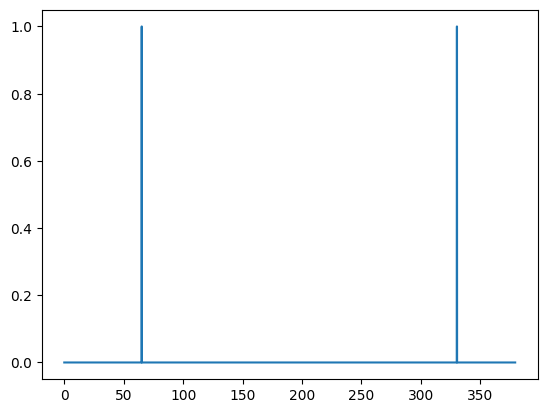

In [8]:
#check how many air puffs are in the recording
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = t, y=air_puff_event)


In [9]:
# define air puff and no air puff
air_puff = air_puff_event == 1
no_air_puff = air_puff_event == 0

In [10]:
import pandas as pd
#import the spikes and define binary spike events
spike_idx = pd.read_csv("C:\\Users\\Hannah\\Documents\\MATLAB\\air_puff_traces\\2026_01_30_0001\\2026_01_30_0001_spikes.csv")
spike_binary = np.zeros(len(pressure))
spike_binary[spike_idx.astype(int)] = 1
spike_binary[spike_idx.astype(int)-1] = 1

In [ ]:
#bin firing rate and air puffs - then compare mean firing rate during airpuff and otherwise
import pandas as pd

sampling_rate_ephys = 20000
bin_size = 0.5
samples_per_bin = int(bin_size*sampling_rate_ephys)

spike_samples = (spike_idx*sampling_rate_ephys).astype(int) #converts seconds to sample index
spike_samples = spike_samples[spike_samples < len(air_puff_event)]
spike_binary = np.zeros(len(air_puff_event))
spike_binary[spike_samples] = 1

n_bins = len(spike_binary) // samples_per_bin
spike_binned = spike_binary[:n_bins*samples_per_bin].reshape(n_bins, samples_per_bin)
airpuff_binned = air_puff_event[:n_bins*samples_per_bin].reshape(n_bins, samples_per_bin)

firing_rate = spike_binned.sum(axis=1)/bin_size
air_puff_fraction = airpuff_binned.mean(axis=1)
# classify bins
airpuff_bins = air_puff_fraction > 0.1
no_air_puff = air_puff_fraction <= 0.1

mean_fr_airpuff = firing_rate[airpuff_bins].mean()

mean_fr_no_airpuff = firing_rate[no_air_puff].mean()

print("Mean firing rate during air puffs:", mean_fr_airpuff)
print("Mean firing rate during no air puffs:", mean_fr_no_airpuff)

Mean firing rate during air puffs: 27.0
Mean firing rate during no air puffs: 2.939153439153439
